Enrollment Data AUC-ROC Score: 0.8330
Semester Data AUC-ROC Score: 0.8814


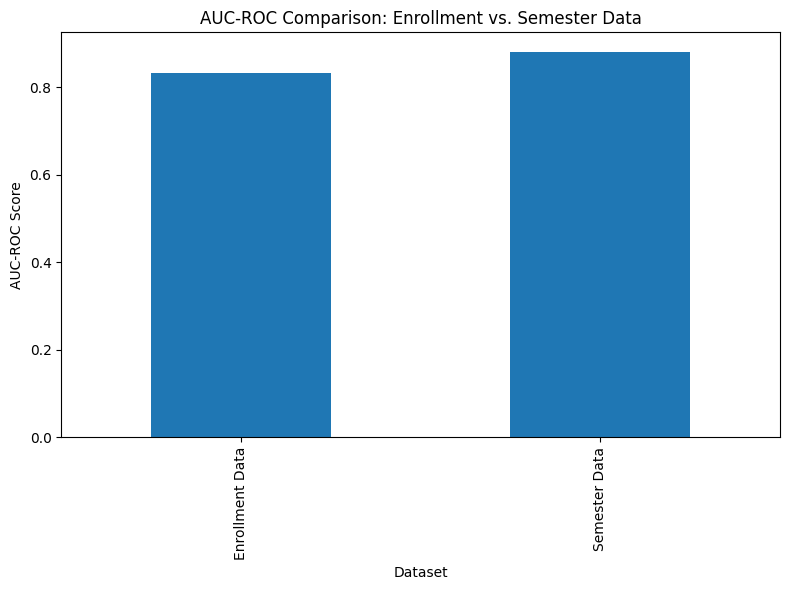

In [2]:
# ===== Step 1: Import Libraries =====
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ===== Step 2: Load Processed Dataset =====
# Load processed features and target from previous program
X_res = pd.read_csv("processed_features.csv")
#y_res = pd.read_csv("processed_target.csv")
y_res = pd.read_csv("processed_target.csv")['Target'].values.ravel()

# Define feature groups
enrollment_features = [
    'Daytime/evening attendance', 'Previous qualification (grade)',
    'Admission grade', 'Age at enrollment', 'Tuition fees up to date',
    'Scholarship holder'
]

semester_features = enrollment_features + ['Curricular units 1st sem (grade)']

# Prepare datasets for comparison
X_enrollment = X_res[enrollment_features]
X_semester = X_res[semester_features]

# ===== Step 3: Split Dataset =====
# Split into training and testing sets
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_enrollment, y_res, test_size=0.2, random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_semester, y_res, test_size=0.2, random_state=42)

# ===== Step 4: Train Models =====
# Enrollment Data Model
clf_enrollment = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5)
clf_enrollment.fit(X_train_e, y_train_e)

# Semester Data Model
clf_semester = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5)
clf_semester.fit(X_train_s, y_train_s)

# ===== Step 5: Evaluate Models =====
# Enrollment Data Performance
y_pred_prob_e = clf_enrollment.predict_proba(X_test_e)[:, 1]
roc_auc_e = roc_auc_score(y_test_e, y_pred_prob_e)

# Semester Data Performance
y_pred_prob_s = clf_semester.predict_proba(X_test_s)[:, 1]
roc_auc_s = roc_auc_score(y_test_s, y_pred_prob_s)

# Print Results
print(f"Enrollment Data AUC-ROC Score: {roc_auc_e:.4f}")
print(f"Semester Data AUC-ROC Score: {roc_auc_s:.4f}")

# ===== Step 6: Visualize Comparison =====
# Create a DataFrame for visualization
results = pd.DataFrame({
    "Dataset": ["Enrollment Data", "Semester Data"],
    "AUC-ROC": [roc_auc_e, roc_auc_s]
})

# Plot the results
results.set_index("Dataset", inplace=True)
results.plot(kind='bar', legend=False, figsize=(8, 6))
plt.title("AUC-ROC Comparison: Enrollment vs. Semester Data")
plt.ylabel("AUC-ROC Score")
plt.xlabel("Dataset")
plt.tight_layout()
plt.savefig("auc_comparison.png")
plt.show()
